In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import os
#import gcm_filters
import xrft
from dask.diagnostics import ProgressBar
#from rechunker import rechunk
import zarr
from xgcm.grid import Grid
import matplotlib

In [2]:
eta_mean = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_mean.zarr')
steric_mean = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/steric_mean.zarr')

In [3]:
uvel_merged = xr.open_zarr('/swot/SUM01/spencer/swot_agulhas_surf/uvel_centered.zarr')
vvel_merged = xr.open_zarr('/swot/SUM01/spencer/swot_agulhas_surf/vvel_centered.zarr')

uvel_merged = uvel_merged.isel(time=slice(1,1500)).isel(k=0)

vvel_merged = vvel_merged.isel(time=slice(1,1500)).isel(k=0)

eta_merged = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_long.zarr')
eta_merged = eta_merged.isel(time=slice(1,1500))

tide_smfit = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/tide_smfit.zarr')
tide_smfit = tide_smfit.isel(time=slice(1,1500)).drop_vars('time')

tide_fit = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/tide_fit.zarr')
tide_fit = tide_fit.isel(time=slice(1,1500)).drop_vars('time')

steric = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/steric_height.zarr')
steric2 = xr.open_zarr('/swot/SUM02/spencer/steric_inc_mean.zarr')

steric2 = steric2.steric - steric_mean.steric + eta_mean.Eta

eta_smfit = eta_merged.Eta-tide_smfit.eta

eta_fit = eta_merged.Eta-tide_fit.eta

eta_sm = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed.zarr')
eta_sm = eta_sm.isel(time=slice(1,1500))

eta_smr = eta_merged.Eta-eta_sm.eta

eta_sma = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed_a.zarr')
eta_sma = eta_sma.isel(time=slice(1,1500))

eta_smra = eta_merged.Eta-eta_sma.eta

eta_smb = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed_b.zarr')
eta_smb = eta_smb.isel(time=slice(1,1500))

eta_smrb = eta_merged.Eta-eta_smb.eta

eta_smc = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed_c.zarr')
eta_smc = eta_smc.isel(time=slice(1,1500))

eta_smrc = eta_merged.Eta-eta_smc.eta

eta_smd = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed_d.zarr')
eta_smd = eta_smd.isel(time=slice(1,1500))

eta_smrd = eta_merged.Eta-eta_smd.eta

eta_sme = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed_e.zarr')
eta_sme = eta_sme.isel(time=slice(1,1500))

eta_smre = eta_merged.Eta-eta_sme.eta

eta_smg = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed_g.zarr')
eta_smg = eta_smg.isel(time=slice(1,1500))

eta_smrg = eta_merged.Eta-eta_smg.eta

eta_smh = xr.open_zarr('/swot/SUM02/spencer/swot_agulhas_surf/eta_smoothed_h.zarr')
eta_smh = eta_smh.isel(time=slice(1,1500))

eta_smrh = eta_merged.Eta-eta_smh.eta



grid = Grid(uvel_merged, coords={'X': {'center': 'i', 'left': 'i_g'}, 'Y': {'center': 'j', 'left': 'j_g'}})

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/dask/array/core.py:4048: PerformanceWarning: Increasing number of chunks by factor of 32
  **blockwise_kwargs,


In [4]:
DXC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DXC.data', dtype='>f4')
DYC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/DYC.data', dtype='>f4')
DXC_array = (xr.DataArray(DXC.reshape(2160,2160),dims=['j','i']).assign_coords(i=eta_merged.i,j=uvel_merged.j))
DYC_array = (xr.DataArray(DYC.reshape(2160,2160),dims=['j','i']).assign_coords(i=eta_merged.i,j=uvel_merged.j))

In [5]:
YC =np.fromfile('/swot/SUM01/spencer/swot_agulhas_test/YC.data', dtype='>f4')
f = 2*2*np.pi/24/3600*np.sin(YC.reshape(2160,2160)*np.pi/180)
f_array = (xr.DataArray(f,dims=['j','i']).assign_coords(i=uvel_merged.i,j=uvel_merged.j))

In [6]:
#Calculate geostrophic velocity
g=9.81

u_g = -g/f*grid.interp(grid.diff(eta_merged.Eta,'Y'),'Y')/DYC_array
v_g = -g/f*grid.interp(grid.diff(eta_merged.Eta,'X'),'X')/DXC_array

u_smfit = -g/f*grid.interp(grid.diff(eta_smfit,'Y'),'Y')/DYC_array
v_smfit = -g/f*grid.interp(grid.diff(eta_smfit,'X'),'X')/DXC_array

u_fit = -g/f*grid.interp(grid.diff(eta_fit,'Y'),'Y')/DYC_array
v_fit = -g/f*grid.interp(grid.diff(eta_fit,'X'),'X')/DXC_array

u_sm = -g/f*grid.interp(grid.diff(eta_smr.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_sm = -g/f*grid.interp(grid.diff(eta_smr.transpose('time','j','i'),'X'),'X')/DXC_array

u_sma = -g/f*grid.interp(grid.diff(eta_smra.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_sma = -g/f*grid.interp(grid.diff(eta_smra.transpose('time','j','i'),'X'),'X')/DXC_array

u_smb = -g/f*grid.interp(grid.diff(eta_smrb.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_smb = -g/f*grid.interp(grid.diff(eta_smrb.transpose('time','j','i'),'X'),'X')/DXC_array

u_smc = -g/f*grid.interp(grid.diff(eta_smrc.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_smc = -g/f*grid.interp(grid.diff(eta_smrc.transpose('time','j','i'),'X'),'X')/DXC_array

u_smd = -g/f*grid.interp(grid.diff(eta_smrd.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_smd = -g/f*grid.interp(grid.diff(eta_smrd.transpose('time','j','i'),'X'),'X')/DXC_array

u_sme = -g/f*grid.interp(grid.diff(eta_smre.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_sme = -g/f*grid.interp(grid.diff(eta_smre.transpose('time','j','i'),'X'),'X')/DXC_array

u_smg = -g/f*grid.interp(grid.diff(eta_smrg.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_smg = -g/f*grid.interp(grid.diff(eta_smrg.transpose('time','j','i'),'X'),'X')/DXC_array

u_smh = -g/f*grid.interp(grid.diff(eta_smrh.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_smh = -g/f*grid.interp(grid.diff(eta_smrh.transpose('time','j','i'),'X'),'X')/DXC_array

u_steric = -g/f*grid.interp(grid.diff(steric.Eta.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_steric = -g/f*grid.interp(grid.diff(steric.Eta.transpose('time','j','i'),'X'),'X')/DXC_array

u_steric2 = -g/f*grid.interp(grid.diff(steric2.transpose('time','j','i'),'Y'),'Y')/DYC_array
v_steric2 = -g/f*grid.interp(grid.diff(steric2.transpose('time','j','i'),'X'),'X')/DXC_array

In [39]:
rms_g = ((((uvel_merged.U.isel(i=slice(914,-914),j=slice(905,-905))-u_g.isel(i=slice(914,-914),j=slice(905,-905)))**2).mean())**(0.5)).values
#rms_smfit = ((((uvel_merged.U[:,920:-920,850:-850]-u_smfit[:,920:-920,850:-850])**2).mean())**(0.5)).values
#rms_steric = ((((uvel_merged.U[:,920:-920,850:-850]-u_steric[:,920:-920,850:-850])**2).mean())**(0.5)).values
#rms_steric2 = ((((uvel_merged.U[:1000,920:-920,850:-850]-u_steric2[:1000,920:-920,850:-850].drop_vars('time'))**2).mean())**(0.5)).values
#rms_fit = ((((uvel_merged.U[:,920:-920,850:-850]-u_fit[:,920:-920,850:-850])**2).mean())**(0.5)).values
#rms_sm = ((((uvel_merged.U[:,920:-920,850:-850]-u_sm[:,920:-920,850:-850])**2).mean())**(0.5)).values
#rms_sma = ((((uvel_merged.U[:,920:-920,850:-850]-u_sma[:,920:-920,850:-850])**2).mean())**(0.5)).values
#rms_smb = ((((uvel_merged.U[:,920:-920,850:-850]-u_smb[:,920:-920,850:-850])**2).mean())**(0.5)).values
#rms_smc = ((((uvel_merged.U[:,920:-920,850:-850]-u_smc[:,920:-920,850:-850])**2).mean())**(0.5)).values
#rms_smd = ((((uvel_merged.U[:,920:-920,850:-850]-u_smd[:,920:-920,850:-850])**2).mean())**(0.5)).values
#rms_sme = ((((uvel_merged.U[:,920:-920,850:-850]-u_sme[:,920:-920,850:-850])**2).mean())**(0.5)).values

In [ ]:
rms_smg = ((((uvel_merged.U[:,920:-920,850:-850]-u_smg[:,920:-920,850:-850])**2).mean())**(0.5)).values
rms_smh = ((((uvel_merged.U[:,920:-920,850:-850]-u_smh[:,920:-920,850:-850])**2).mean())**(0.5)).values

In [7]:
unfiltered_ps = xrft.power_spectrum(eta_merged.Eta.isel(time=slice(1,1450)).drop_vars('time').chunk({'time':-1}),dim=['time'],window='hann',window_correction=True)
steric_ps = xrft.power_spectrum(steric.Eta.isel(time=slice(1,1450)).drop_vars('time').chunk({'time':-1}),dim=['time'],window='hann',window_correction=True)
steric2_ps = xrft.power_spectrum(steric2.isel(time=slice(1,1450)).drop_vars('time').chunk({'time':-1}),dim=['time'],window='hann',window_correction=True)
smfit_ps = xrft.power_spectrum(eta_smfit.isel(time=slice(1,1450)).drop_vars('time').chunk({'time':-1}),dim=['time'],window='hann',window_correction=True)
fit_ps = xrft.power_spectrum(eta_fit.isel(time=slice(1,1450)).drop_vars('time').chunk({'time':-1}),dim=['time'],window='hann',window_correction=True)
smrd_ps = xrft.power_spectrum(eta_smrd.isel(time=slice(1,1450)).drop_vars('time').chunk({'time':-1}),dim=['time'],window='hann',window_correction=True)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


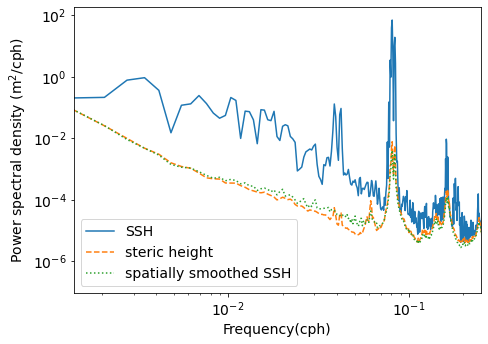

In [8]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

fig=plt.figure(figsize=(7,5))
unfiltered_ps.isel(i=slice(914,-914),j=slice(905,-905),freq_time=slice(725,2000)).mean(['i','j']).plot(label='SSH')
#steric_ps.isel(i=slice(914,-914),j=slice(905,-905),freq_time=slice(725,2000)).mean(['i','j']).plot(label='steric from T,S')
steric2_ps.isel(i=slice(914,-914),j=slice(905,-905),freq_time=slice(725,2000)).mean(['i','j']).plot(label='steric height',linestyle='--')
smrd_ps.isel(i=slice(914,-914),j=slice(905,-905),freq_time=slice(725,2000)).mean(['i','j']).plot(label='spatially smoothed SSH',linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower left')
plt.xlim(0.0014,0.25)
plt.ylabel('Power spectral density (m$^2$/cph)')
plt.xlabel('Frequency(cph)')
plt.title('')

plt.tight_layout()

fig=plt.gcf()
fig.savefig('steric_spectrum.png')

(0.14, 0.16)

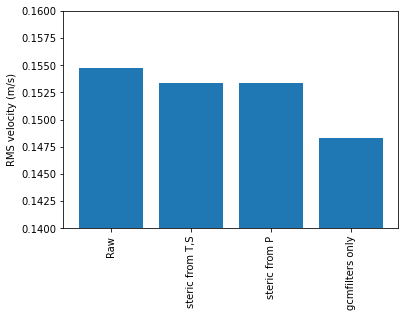

In [23]:
plt.bar(np.array(['Raw','steric from T,S','steric from P','gcmfilters only']),#,'gcmfilters@200km'
       np.array([rms_g,rms_steric,rms_steric2,rms_smd]))

plt.ylabel('RMS velocity (m/s)')
plt.xticks(rotation=90) 
plt.ylim(0.14,0.16)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


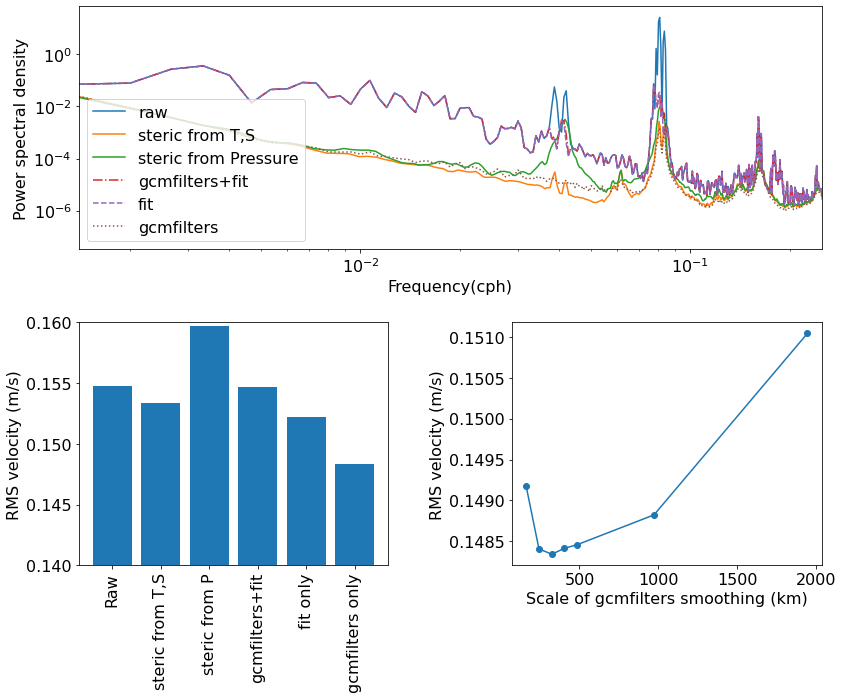

In [10]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)


fig=plt.figure(figsize=(12,10))

plt.subplot(2,1,1)

unfiltered_ps[749:,920:-920,850:-850].mean(['i','j']).plot(label='raw')
steric_ps[920:-920,850:-850,759:].mean(['i','j']).plot(label='steric from T,S')
steric2_ps[900:,920:-920,850:-850].mean(['i','j']).plot(label='steric from Pressure')
smfit_ps[749:,920:-920,850:-850].mean(['i','j']).plot(label='gcmfilters+fit',linestyle='-.')
fit_ps[749:,920:-920,850:-850].mean(['i','j']).plot(label='fit',linestyle='--')
smrd_ps[749:,920:-920,850:-850].mean(['i','j']).plot(label='gcmfilters',linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(0.0014,0.25)
plt.ylabel('Power spectral density')
plt.xlabel('Frequency(cph)')
plt.title('')

plt.subplot(2,2,3)
plt.bar(np.array(['Raw','steric from T,S','steric from P','gcmfilters+fit','fit only','gcmfilters only']),#,'gcmfilters@200km'
       np.array([rms_g,rms_steric,rms_steric2,rms_smfit,rms_fit,rms_smd]))

plt.ylabel('RMS velocity (m/s)')
plt.xticks(rotation=90) 
plt.ylim(0.14,0.16)

plt.subplot(2,2,4)
plt.plot(np.array([1200,600,300,250,200,150,100])*1.62,#,'gcmfilters@200km'
       np.array([rms_smc,rms_sma,rms_smb,rms_smh, rms_smd, rms_smg,rms_sme]),marker='o')
plt.ylabel('RMS velocity (m/s)')
plt.xlabel('Scale of gcmfilters smoothing (km)')

plt.tight_layout()

fig.subplots_adjust(wspace=0.4,hspace=0.3)
fig.savefig('barotropic_removal.png')

In [11]:
rms_steric2

array(nan)

array(0.15216944)

array(0.14882245)

array(0.14882245)

array(0.14845809)

array(0.15104368)

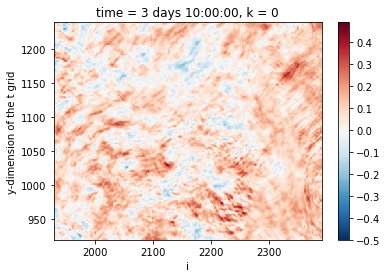

In [187]:
(uvel_merged.U[:,920:-920,850:-850]-u_smfit[:,920:-920,850:-850]).isel(time=10).plot(levels=np.arange(-0.5,0.5,0.01))

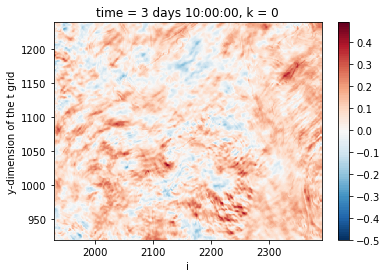

In [161]:
(uvel_merged.U[:,920:-920,850:-850]-u_g[:,920:-920,850:-850]).isel(time=10).plot(levels=np.arange(-0.5,0.5,0.01))

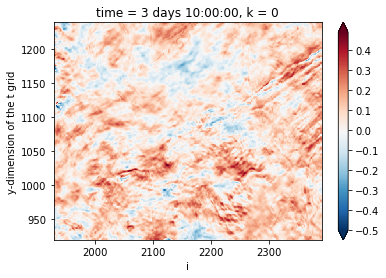

In [162]:
(uvel_merged.U[:,920:-920,850:-850]-u_steric[:,920:-920,850:-850]).isel(time=10).plot(levels=np.arange(-0.5,0.5,0.01))

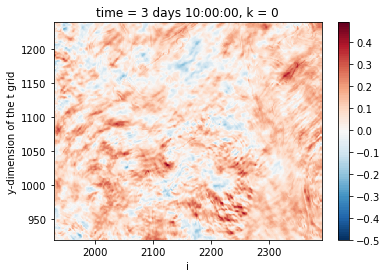

In [163]:
(uvel_merged.U[:,920:-920,850:-850]-u_sm[:,920:-920,850:-850]).isel(time=10).plot(levels=np.arange(-0.5,0.5,0.01))

In [99]:
uvel_merged = xr.open_zarr('/swot/SUM01/spencer/swot_agulhas_surf/uvel.zarr')

In [176]:
eta_fit[:,920:-920,850:-850]

<xarray.DataArray (time: 1499, j: 320, i: 460)>
dask.array<getitem, shape=(1499, 320, 460), dtype=float64, chunksize=(1, 160, 230), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) timedelta64[ns] 3 days 00:00:00 ... 65 days 10:00:00
  * i        (i) int64 1930 1931 1932 1933 1934 ... 2385 2386 2387 2388 2389
    iter     (time) int64 10368 10512 10656 10800 ... 225792 225936 226080
  * j        (j) float64 920.0 921.0 922.0 ... 1.237e+03 1.238e+03 1.239e+03
    x        (j, i) float32 2.219 2.24 2.26 2.281 ... 11.72 11.74 11.76 11.78
    y        (j, i) float32 -45.73 -45.73 -45.73 -45.73 ... -41.25 -41.25 -41.25

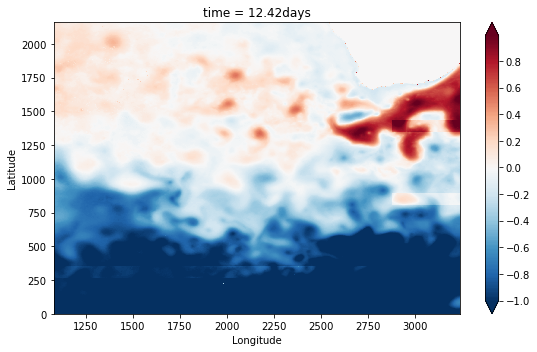

In [177]:
plt.figure(figsize=(8,5))
for tt in range(1,300):
    plt.clf()
    eta_fit.drop_vars('time').isel(time=tt).plot.pcolormesh(x='i',y='j',levels=np.arange(-1,1,0.01),rasterized=True,cbar_kwargs={'extend':'both'})
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('time = ' + '{0:.2f}'.format((eta_smr.time.values[tt]-eta_smr.time.values[1]).item()/24/10**9/3600)+ 'days')
    plt.tight_layout()
    
    fig = plt.gcf()
    fig.savefig("/home/spencerj/agulhas-offline/movie/eta1/fig{:03d}.jpg".format(tt))